# Multi-Phase Electric Power System Analysis

### Libraries Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### System Configuration

In [3]:
voltage_rms = 230      # Volts
line_resistance = 0.5  # Ohms
frequency = 25         # Hz

# Phase currents (amps)
current_mags = [7, 10, 9]

# Phase deviations (degrees)
phase_deviations = [0, 0, 0]

# Number of cycles
num_cycles = 3

# Printing Information
N = len(current_mags)
print(f"System Setup: {N}-Phase System initialized.")

System Setup: 3-Phase System initialized.


### Calculation Engine

In [4]:
# Conversions
I_rms = np.array(current_mags)
phi_dev_rad = np.radians(np.array(phase_deviations))

# Creating ideal spacing angles
ref_angles = np.linspace(0, 2*np.pi, N, endpoint=False)
current_angles_rad = ref_angles + phi_dev_rad

# Calculating power and loss

# Active power delivered
power_per_phase = voltage_rms * I_rms * np.cos(phi_dev_rad)
total_active_power = np.sum(power_per_phase)

# Transmission loss
loss_per_phase = (I_rms ** 2) * line_resistance
total_loss = np.sum(loss_per_phase)

# Efficiency
power_input = total_active_power + total_loss
efficiency = (total_active_power / power_input) * 100 if power_input > 0 else 0

# Neutral current imbalance
current_phasors = I_rms * np.exp(1j * current_angles_rad)
neutral_current_mag = np.abs(np.sum(current_phasors))

# Time-domain data
t = np.linspace(0, num_cycles*(1/frequency), 1000)
omega = 2 * np.pi * frequency

waveforms_i = np.zeros((N, len(t)))
waveforms_p = np.zeros((N, len(t)))

for k in range(N):
    # Current Waveform
    waveforms_i[k] = np.sqrt(2) * I_rms[k] * np.cos(omega * t - current_angles_rad[k])
    
    # Voltage Waveform
    v_inst = np.sqrt(2) * voltage_rms * np.cos(omega * t - ref_angles[k])
    
    # Instantaneous Power
    waveforms_p[k] = v_inst * waveforms_i[k]

total_inst_power = np.sum(waveforms_p, axis=0)


# Results
print("-" * 45)
print(f"--- System Perfromance Analysis ({N}-Phase) ---")
print("-" * 45)
print(f"Total Active Power         : {total_active_power/1000:.3f} kW")
print(f"Total Transmission Loss    : {total_loss:.2f} W")
print(f"System Efficiency          : {efficiency:.2f} %")
print(f"Neutral Current            : {neutral_current_mag:.2f} A")
print("-" * 45)
if neutral_current_mag > 1.0:
    print("Status: System is unbalanced. High neutral current.")
else:
    print("Status: System is balanced. Power is smooth.")

---------------------------------------------
--- System Perfromance Analysis (3-Phase) ---
---------------------------------------------
Total Active Power         : 5.980 kW
Total Transmission Loss    : 115.00 W
System Efficiency          : 98.11 %
Neutral Current            : 2.65 A
---------------------------------------------
Status: System is unbalanced. High neutral current.


### Visualizing Results

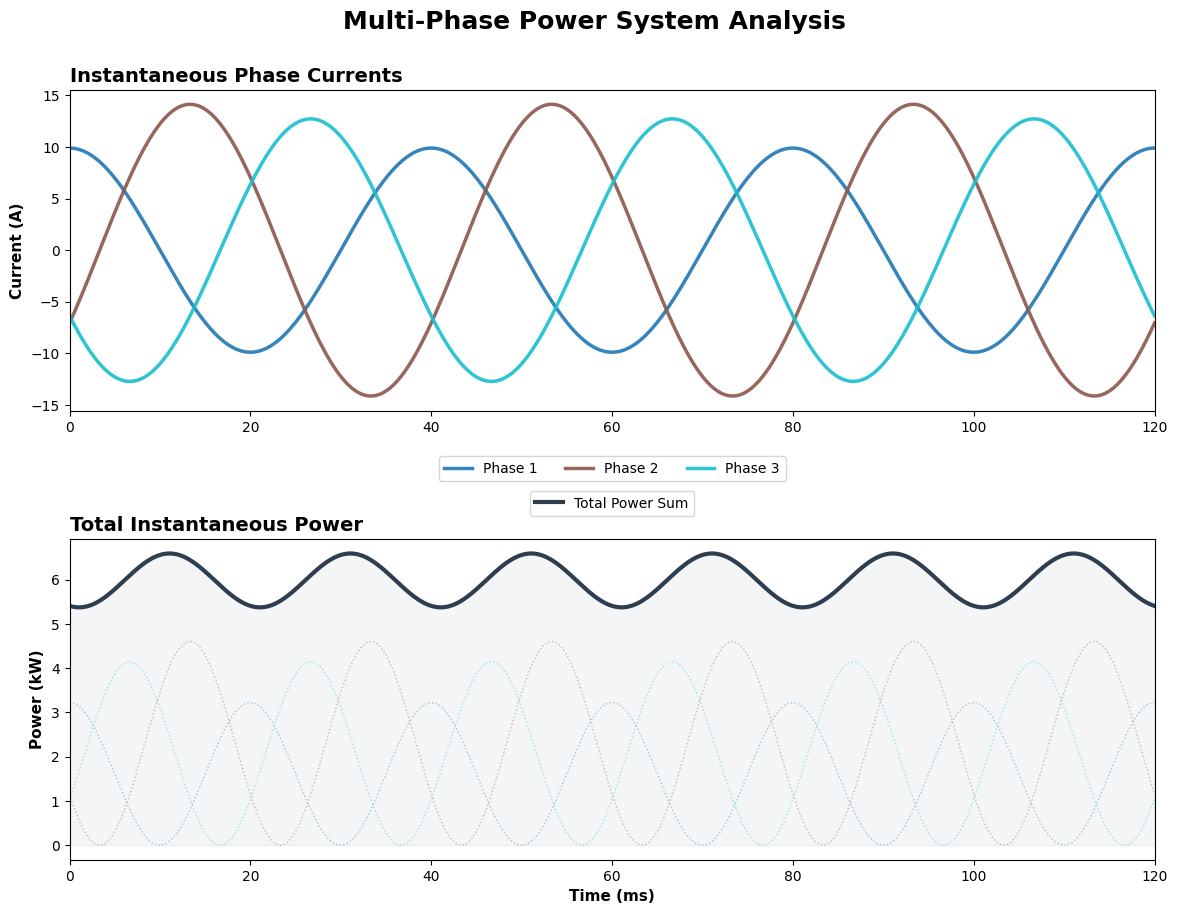

In [5]:
# Creating figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), dpi=100)
fig.suptitle("Multi-Phase Power System Analysis", fontsize=18, fontweight='bold', y=0.96)
colors = plt.cm.tab10(np.linspace(0, 1, N))

# Plotting wave forms
for k in range(N):
    ax1.plot(t * 1000, waveforms_i[k], 
             label=f'Phase {k+1}', 
             color=colors[k], 
             linewidth=2.5, 
             alpha=0.9)

ax1.set_title("Instantaneous Phase Currents", fontsize=14, loc='left', fontweight='bold')
ax1.set_ylabel("Current (A)", fontsize=11, fontweight='bold')
ax1.set_xlim(0, num_cycles*(1/frequency)*1000)
ax1.tick_params(labelsize=10)

# Legend at the bottom
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=False, ncol=N, fontsize=10, frameon=True)

# Total power
for k in range(N):
    ax2.plot(t * 1000, waveforms_p[k] / 1000, 
             color=colors[k], linestyle=':', linewidth=1, alpha=0.4)

avg_p_kw = total_active_power / 1000
ax2.plot(t * 1000, total_inst_power / 1000,
         color='#2c3e50', linewidth=3,
         label="Total Power Sum")

# Filling area under the curve
ax2.fill_between(t * 1000, total_inst_power / 1000, 0, color='#2c3e50', alpha=0.05)

ax2.set_title("Total Instantaneous Power", fontsize=14, loc='left', fontweight='bold')
ax2.set_ylabel("Power (kW)", fontsize=11, fontweight='bold')
ax2.set_xlabel("Time (ms)", fontsize=11, fontweight='bold')
ax2.set_xlim(0, num_cycles*(1/frequency)*1000)


# Legend on the top
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=False, ncol=N, fontsize=10, frameon=True)

plt.subplots_adjust(hspace=0.4)
plt.show()